In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("aug_train.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.columns.tolist()

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
df["target"].value_counts()

target
0.0    14381
1.0     4777
Name: count, dtype: int64

# Preprocesssing

In [8]:
from preprocessing_1 import Preprocessing
pre_pross = Preprocessing(df)

In [9]:
pre_pross.handle_imbalance()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920000,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776000,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624000,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789000,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767000,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28757,21952,city_21,0.652873,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,100-500,Pvt Ltd,1,17,1.0
28758,2198,city_21,0.764499,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,50-99,Pvt Ltd,>4,68,1.0
28759,28092,city_103,0.920000,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,101,1.0
28760,5555,city_21,0.699495,NaN,Has relevent experience,no_enrollment,Masters,STEM,6,NaN,Pvt Ltd,1,147,1.0


In [10]:
df = pre_pross.preprocess()

Outliers have been capped.


/workspaces/employeeRetentionPredection/preprocessing_1.py:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df["last_new_job"]=self.df["last_new_job"].replace(i,j)
/workspaces/employeeRetentionPredection/preprocessing_1.py:66: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.df["experience"]=self.df["experience"].replace(i,j)


In [11]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.527376,0.920000,0.510688,1,0.477886,0.586342,0.548748,21,1,0.681344,2.0,36.0,1.0
1,29725,0.283951,0.776000,0.510688,0,0.477886,0.586342,0.548748,15,4,0.410670,4.5,47.0,0.0
2,11561,0.857050,0.624000,0.510899,0,0.628494,0.586342,0.548748,5,1,0.681344,0.5,83.0,0.0
3,33241,0.484375,0.789000,0.510899,0,0.334177,0.586342,0.276276,0,1,0.410670,0.5,52.0,1.0
4,666,0.397351,0.767000,0.510688,1,0.477886,0.325591,0.548748,21,4,0.162451,4.5,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28757,21952,0.857050,0.652873,0.510688,1,0.477886,0.586342,0.548748,8,5,0.410670,2.0,17.0,1.0
28758,2198,0.857050,0.764499,0.510688,1,0.477886,0.586342,0.548748,17,4,0.410670,4.5,68.0,1.0
28759,28092,0.527376,0.920000,0.510688,1,0.477886,0.586342,0.548748,21,1,0.681344,2.0,101.0,1.0
28760,5555,0.857050,0.699495,0.510899,1,0.477886,0.325591,0.548748,6,1,0.410670,2.0,147.0,1.0


In [12]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [13]:
df["target"].value_counts()

target
1.0    14381
0.0    14381
Name: count, dtype: int64

# Base Model Evaulation

In [14]:
from baseModelScore import evaluate_models
metrics_df = evaluate_models(df)

In [15]:
metrics_df

,Model,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,AUC_ROC_Train,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,AUC_ROC_Test
0,LogisticRegression,0.830023,0.830062,0.830023,0.830018,0.875759,0.824787,0.824949,0.824787,0.824766,0.875459
1,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.853294,0.853328,0.853294,0.853291,0.922100
2,XGBoost,0.910339,0.910340,0.910339,0.910339,0.974368,0.851903,0.851972,0.851903,0.851896,0.923289
3,LightGBM,0.872180,0.872267,0.872180,0.872173,0.949448,0.851730,0.851910,0.851730,0.851711,0.922148


# Hyper Paramater Tuning 

In [16]:
from hyper_param import hyperparam_models
gredsearchsv,optuna=hyperparam_models(df,"target")

/home/codespace/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I 2024-10-23 19:08:13,992] A new study created in memory with name: no-name-ff88515d-1740-4477-ba2a-676a56cb0fda
[I 2024-10-23 19:08:14,245] Trial 0 finished with value: 0.8482530853467756 and parameters: {'max_depth': 9, 'min_child_weight': 9, 'subsample': 0.8880167129609826, 'colsample_bytree': 0.8092769846769967}. Best is trial 0 with value: 0.8482530853467756.
[I 2024-10-23 19:08:14,487] Trial 1 finished with value: 0.8501651312358769 and parameters: {'max_depth': 7, 'min_child_weight': 5, 'subsample': 0.9861347758702419, 'colsample_bytree': 0.8915237756301283}. Best is trial 1 with value: 0.8501651312358769.
[I 2024-10-23 19:08:14,608] Trial 2 finished with value: 0.8461672171041196 and parameters: {'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.744785166690254, 'colsample_bytree': 0.8389904911823816}. Best is trial 1 with value: 0.8501651312358769.
[I 2024-10-23 19:08:14,897] Trial 3 finished with value: 0.8482530853467756 and parameters: {'max_depth': 10, 'min_child_weig

In [17]:
h_df=pd.concat([gredsearchsv,optuna],axis=0)
h_df

,Model,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test
0,LogisticRegression,0.829458,0.829504,0.829458,0.829452,0.824787,0.824929,0.824787,0.824768
1,RandomForestClassifier,0.837846,0.838413,0.837846,0.837778,0.836259,0.836970,0.836259,0.836174
0,XGBoost,0.943500,0.943500,0.943500,0.943500,0.857813,0.857863,0.857813,0.857808
1,LightGBM,0.926811,0.926816,0.926811,0.926811,0.855206,0.855206,0.855206,0.855206


# Text evaluation and profession sumarry claffication  

In [18]:
from text_class import text_model


Epoch [1/10], Loss: 0.6942
Epoch [2/10], Loss: 0.6936
Epoch [3/10], Loss: 0.6932
Epoch [4/10], Loss: 0.6924
Epoch [5/10], Loss: 0.6919
Epoch [6/10], Loss: 0.6914
Epoch [7/10], Loss: 0.6906
Epoch [8/10], Loss: 0.6896
Epoch [9/10], Loss: 0.6889
Epoch [10/10], Loss: 0.6879
Accuracy: 0.62
ROC-AUC: 0.83


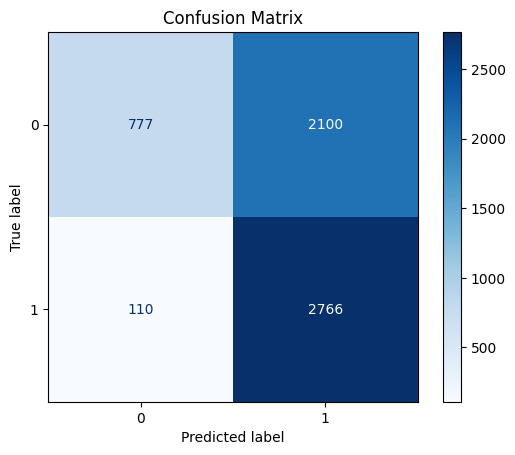

In [19]:
x=text_model(df, target_feature='target')

In [20]:
# Example usage:
new_features = "A seasoned professional with a distinguished two-decade odyssey within the dynamic realm of STEM, currently contributing to the evolution of a mid-sized private enterprise ensconced within the vibrant metropolis of city_103. Fortified with a graduate degree and a rich tapestry of industry-specific acumen, I am poised to make substantial contributions to intricate initiatives and catalyze groundbreaking solutions."
print(f'The features are classified as: {x(new_features)}')


The features are classified as: 1
